In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [9]:
df = pd.read_csv('../Forecasting-Time-Series-Data-with-Facebook-Prophet/data/co2-ppm-daily_csv.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']
df.describe()

,y
count,19387.000000
mean,356.621549
std,27.548204
min,312.330000
25%,332.280000
50%,354.570000
75%,378.405000
max,415.640000


In [3]:
model = Prophet()
model.fit(df)

09:47:44 - cmdstanpy - INFO - Chain [1] start processing
09:48:02 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = model.make_future_dataframe(periods=365*10)
forecast = model.predict(future)

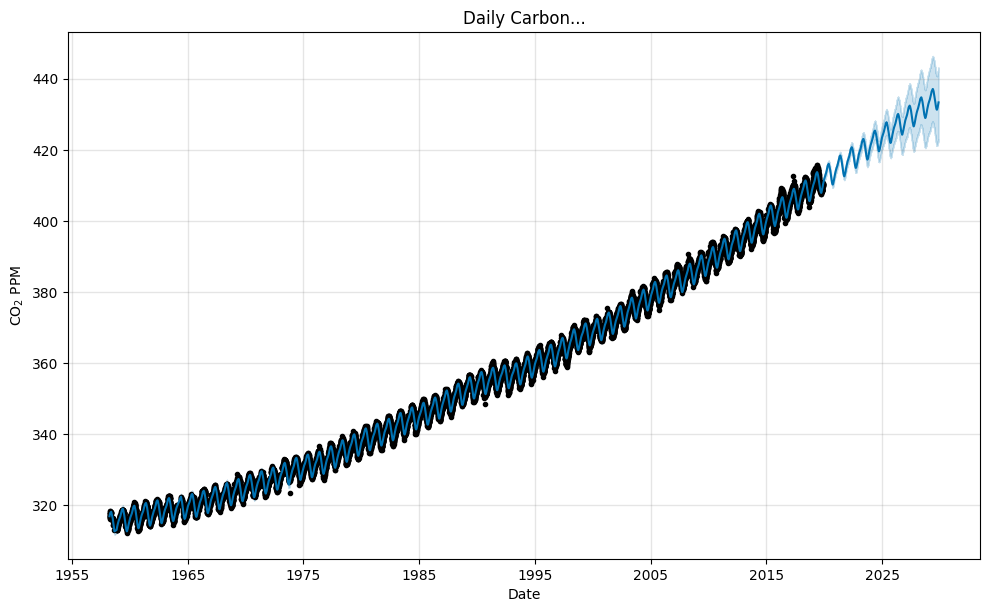

In [6]:
fig = model.plot(forecast, xlabel='Date', ylabel=r'CO$_2$ PPM')
plt.title('Daily Carbon...')
plt.show()

In [11]:
forecast.head(3).T

,0,1,2
ds,1958-03-30 00:00:00,1958-03-31 00:00:00,1958-04-02 00:00:00
trend,314.926687,314.929041,314.933749
yhat_lower,316.02774,316.12966,316.25049
yhat_upper,317.809968,317.773416,317.841986
trend_lower,314.926687,314.929041,314.933749
trend_upper,314.926687,314.929041,314.933749
additive_terms,1.98553,2.015498,2.11828
additive_terms_lower,1.98553,2.015498,2.11828
additive_terms_upper,1.98553,2.015498,2.11828
weekly,0.003281,-0.010718,0.003306


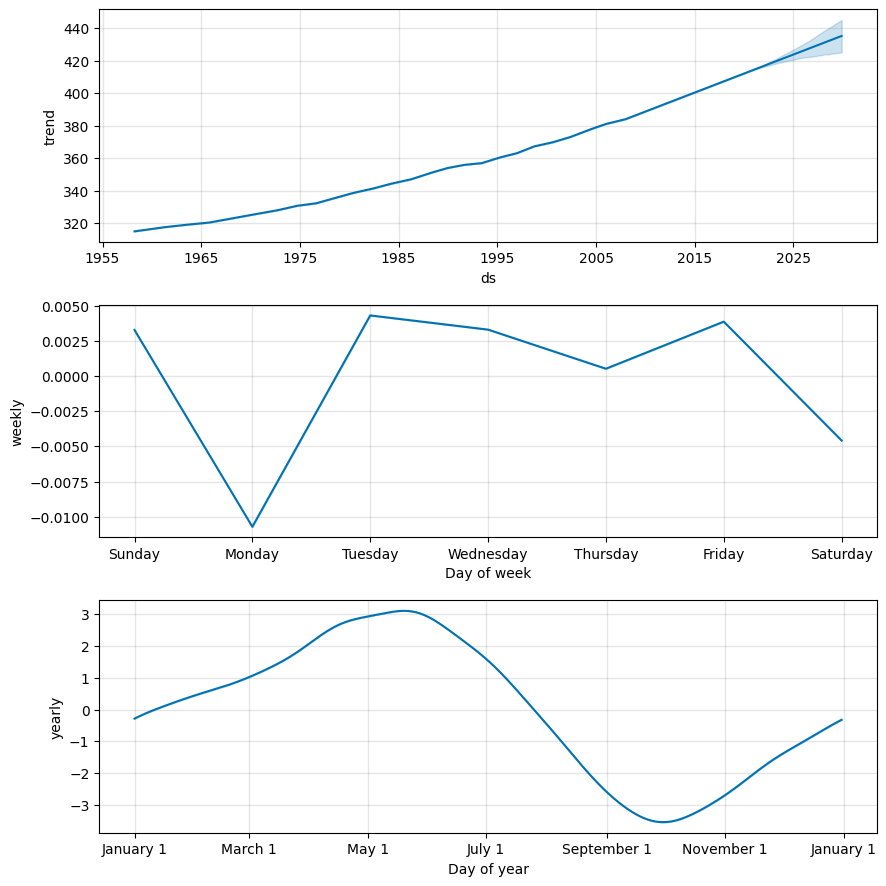

In [10]:
fig2 = model.plot_components(forecast)
plt.show()